In [25]:
import json
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader
# from torchvision.models import vgg19
# import torch
# from torch.utils import data as data_utils

import tensorflow as tf


columns = ['opp_switch', 'opp_damage_dealt', 'opp_effectiveness', 'opp_damage_taken', 'opp_heal', 'opp_faint', 'opp_boost_off', 'opp_boost_def', 'opp_boost_spe', 'opp_unboost_off', 'opp_unboost_def', 'opp_unboost_spe', 'opp_basepower', 'opp_accuracy', 'opp_stab', 'opp_priority', 'opp_first', 'switch', 'damage_dealt', 'effectiveness', 'damage_taken', 'heal', 'faint', 'boost_off', 'boost_def', 'boost_spe', 'unboost_off', 'unboost_def', 'unboost_spe', 'basepower', 'accuracy', 'stab', 'priority', 'first', 'turn', 'turn_norm', 'opp_alive', 'alive', 'weight', 'winner', 'opp_winner', 'opp_usage']


In [2]:
with open('datasets/images.json') as fl:
  _data = json.load(fl)

train_images, train_labels, train_poke = list(zip(
  *[(np.array(img), label, poke) for img, label, poke in
    zip(_data['train_images'], _data['train_labels'], _data['train_poke'])
    if np.array(img).shape == np.array(_data['train_images'][0]).shape]
))

test_images, test_labels, test_poke = zip(
	*[(np.array(img), label, poke) for img, label, poke in
	  zip(_data['test_images'], _data['test_labels'], _data['test_poke'])
    if np.array(img).shape == np.array(_data['test_images'][0]).shape]
)

train_labels, test_labels = np.array(train_labels), np.array(test_labels)

In [3]:
print(len(train_images))
print(len(_data['train_images']))
print(len(test_images))
print(len(_data['test_images']))


1295
1295
212
212


In [4]:
train_images[0].shape

(8, 42)

,opp_switch,opp_damage_dealt,opp_effectiveness,opp_damage_taken,opp_heal,opp_faint,opp_boost_off,opp_boost_def,opp_boost_spe,opp_unboost_off,...,priority,first,turn,turn_norm,opp_alive,alive,weight,winner,opp_winner,opp_usage
0,1.000000,0.685180,0.893561,0.655771,0.632909,0.119332,0.836070,0.897137,0.856419,0.927803,...,0.307882,0.904827,0.344687,0.281275,1.000000,1.000000,1.000000,0.998937,0.988785,0.978328
1,0.556622,0.795640,0.919894,0.696509,0.722698,0.190698,1.000000,1.000000,1.000000,0.996160,...,0.331105,0.969185,0.448413,0.385131,0.960633,0.958816,0.997260,1.000000,0.987671,0.978516
2,0.521332,0.810252,0.922390,0.724926,0.865996,0.247014,0.938191,0.986214,0.932995,0.977727,...,0.561576,0.981464,0.554952,0.491236,0.913111,0.912366,0.994574,0.998454,0.989292,0.985441
3,0.500445,0.837873,0.929375,0.757121,0.971586,0.289931,0.901165,0.938494,0.929054,0.957757,...,0.577058,0.994919,0.652861,0.590456,0.867941,0.865903,0.994162,0.998711,0.989022,0.988512
4,0.488072,0.871691,0.930734,0.781556,0.954266,0.342363,0.875784,0.893955,0.859234,1.000000,...,0.657284,0.995390,0.750179,0.691898,0.816287,0.814240,0.990598,0.999227,0.988481,0.990412
5,0.476539,0.909887,0.935032,0.807795,1.000000,0.392368,0.845626,0.876988,0.849662,0.980799,...,0.899719,1.000000,0.847572,0.791817,0.762349,0.759539,0.995580,0.996778,0.991049,0.993726
6,0.455256,0.983253,0.949830,0.882208,0.925073,0.493155,0.773365,0.772004,0.737050,0.964670,...,1.000000,0.999859,0.936031,0.895218,0.701588,0.696607,0.994120,0.995780,0.992096,0.998269
7,0.413087,1.000000,1.000000,1.000000,0.645052,1.000000,0.448791,0.379639,0.422860,0.867127,...,0.931034,0.899134,1.000000,1.000000,0.613299,0.615432,0.989694,0.988241,1.000000,1.000000


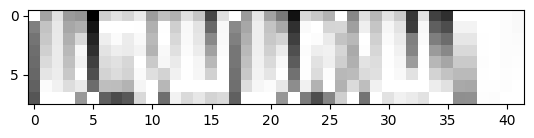

In [5]:
all_images = np.concatenate((train_images, test_images), axis=0)
img = np.mean(all_images, axis=0)
display(pd.DataFrame(img / img.max(axis=0) , columns=columns))
plt.imshow(img / img.max(axis=0), cmap='gray')

train_images = [x / img.max(axis=0) - 0.5 for x in train_images]
test_images = [x / img.max(axis=0) - 0.5 for x in test_images]
train_images, test_images = np.array(train_images), np.array(test_images)


In [6]:
print(type(train_images))
train_images = train_images.reshape(len(train_labels), 8, 42, 1)
test_images = test_images.reshape(len(test_labels), 8, 42, 1)

<class 'numpy.ndarray'>


In [14]:
rating_map = {'S': 1, 'S-': 0.95, 'A+': 0.85, 'A': 0.75, 'A-': 0.65, 'B+': 0.55, 'B': 0.45, 'B-': 0.35, 'C+': 0.2, 'C': 0.1, 'C-': 0}
# rating_map_reverse = {1: 'S', 0.95: 'S-', 0.85: 'A+', 0.75: 'A', 0.65: 'A-', 0.55: 'B+', 0.45: 'B', 0.35: 'B-', 0.2: 'C+', 0.1: 'C', 0: 'C-'}
rating_map_reverse = {1: 0, 0.95: 1, 0.85: 2, 0.75: 3, 0.65: 4, 0.55: 5, 0.45: 6, 0.35: 7, 0.2: 8, 0.1: 9, 0: 10}

save_train_labels = train_labels
save_test_labels = test_labels

# change the number to label
train_labels = np.array([rating_map_reverse[i] for i in train_labels])
test_labels = np.array([rating_map_reverse[i] for i in test_labels])

In [17]:
print(test_labels)

[ 3  4 10  4  6  3  5  3  6  4  3  3  4 10  3  7  3  7  6  3  3  4  3  3
 10  3  4  4  4  3  6  9  6  5  4  5  4  9  6  4  5  4  6  4  4  6  5  4
  4  4  4  4  4  9  4  7  4  4  4  3  4 10  5  5  3  9  6  5  3  4  4 10
  6  3  3  5  3  4  4  3 10  4  3  4  3  4  4  5  3  6  6  4  5  6  6  5
  4  3  6  4  3  4  3  4  4  7 10  9  4  3  4  5  6  3  4 10  4  4  3  3
  4  4  6  3  4  4  6  3  4 10  3  3  4  4  4  7  4  6 10  6  4  4  3  4
  4  6  3  5  3  9  3  6  6  4  4  4  3  6  3  3  4 10  3  3  3  4  3  3
  3  6  3 10  3  3 10  4  4  4  5  5  4  3  7  3  5  4  4  4  3  3 10  4
  7  3  4  3  5  4  7  4  4  4  4  4  6  3  7  3  4  7  4  4]


In [21]:
test_labels.shape
pred.shape

(212, 11)

In [ ]:
pred = argmax(pred, axis=1)

In [37]:
import keras
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras import Sequential

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.metrics import accuracy_score


# cnn regression model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(8, 42, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_images, train_labels, epochs=1, batch_size=10, validation_split=0.3, callbacks=[early_stop])

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

# r2 score

pred = tf.math.argmax(pred, axis=1)
print(pred.shape)
print(test_labels.shape)

# display(pred)
# display(test_labels)

pred = model.predict(test_images)

print(np.count_nonzero(np.array(test_labels) == pred) / len(test_labels))

7/7 [==============================] - 0s 8ms/step - loss: 2.1825 - accuracy: 0.3255
0.3254716992378235
(212,)
(212,)
7/7 [==============================] - 0s 4ms/step
0.0


/tmp/ipykernel_975/817676117.py:47: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.count_nonzero(np.array(test_labels) == pred) / len(test_labels))


In [13]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['r2_score']
val_acc = history.history['val_r2_score']
epochs = range(1, len(train_loss) + 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(epochs[1:], train_loss[1:], 'bo', label='Training loss')
ax[0].plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(epochs[1:], train_acc[1:], 'bo', label='Training R2')
ax[1].plot(epochs[1:], val_acc[1:], 'b', label='Validation R2')
ax[1].set_title('Training and validation R2')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('R2')
ax[1].legend()

plt.show()


KeyError: 'r2_score'

In [327]:
from itertools import groupby
groups = groupby(sorted(zip(test_images, test_labels, test_poke), key=lambda x: x[-1]), key=lambda x: x[-1])

pred = []
true = []

for k, v in groups:
	images = []
	for data in v:
		true_ = data[1]
		images.append(data[0])
	true.append(true_)
	pred.append(np.mean(model.predict(np.array(images))))


3/3 [==============================] - 0s 10ms/step


In [328]:
r2_score(true, pred)

-0.5120728967317305